# Embeddings

### train_dsl (Confidential)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("train_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("train_dsl_embeddings.npy", embeddings)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/500
1000/1000 [==============================] - 10s 10ms/sample - loss: 34041.5859
Epoch 2/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 29660.0523
Epoch 3/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 21763.4508
Epoch 4/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 19887.3187
Epoch 5/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 19106.2465
Epoch 6/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18603.4898
Epoch 7/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18211.7535
Epoch 8/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 17793.2797
Epoch 9/500
1000/1000 [==============================] - 9s 9ms/sa

1000/1000 [==============================] - 9s 9ms/sample - loss: 6868.2658
Epoch 175/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6860.4165
Epoch 176/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6856.7557
Epoch 177/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6852.0478
Epoch 178/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6847.3136
Epoch 179/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6842.0775
Epoch 180/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6838.4980
Epoch 181/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6833.8782
Epoch 182/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6830.0487
Epoch 183/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6830.4501
Epoch 184/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6830.3712
Epoch 185/500

1000/1000 [==============================] - 9s 9ms/sample - loss: 6645.4268
Epoch 355/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6645.1547
Epoch 356/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6645.9097
Epoch 357/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6645.9404
Epoch 358/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6645.4231
Epoch 359/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6645.0226
Epoch 360/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6643.2045
Epoch 361/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6644.4745
Epoch 362/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6645.2921
Epoch 363/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6644.2705
Epoch 364/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6644.2923
Epoch 365/500

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("train_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()



<Figure size 640x480 with 1 Axes>

### val_dsl

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("val_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("val_dsl_embeddings.npy", embeddings)

Epoch 1/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 33998.5797
Epoch 2/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 29175.5012
Epoch 3/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 21241.6457
Epoch 4/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 19649.4383
Epoch 5/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 19044.8887
Epoch 6/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18691.0980
Epoch 7/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18426.2316
Epoch 8/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18188.3367
Epoch 9/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 17933.4723
Epoch 10/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 17593.7738
Epoch 11/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 17042.2832
Epoch 12

1000/1000 [==============================] - 9s 9ms/sample - loss: 6826.0072
Epoch 182/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6821.3490
Epoch 183/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6821.5746
Epoch 184/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6828.5779
Epoch 185/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6823.7383
Epoch 186/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6820.0587
Epoch 187/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6816.5150
Epoch 188/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6819.9288
Epoch 189/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6821.2348
Epoch 190/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6818.2038
Epoch 191/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6819.1771
Epoch 192/500

1000/1000 [==============================] - 8s 8ms/sample - loss: 6696.2687
Epoch 362/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6696.4564
Epoch 363/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6697.4104
Epoch 364/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6702.7733
Epoch 365/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6703.9809
Epoch 366/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6700.6726
Epoch 367/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6698.0322
Epoch 368/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6692.7283
Epoch 369/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6691.9479
Epoch 370/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6690.2357
Epoch 371/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6692.0237
Epoch 372/500

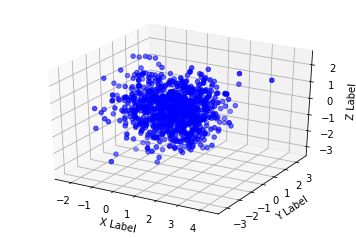

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("val_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


### PD_test_dsl (PD)

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("PD_test_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("PD_test_dsl_embeddings.npy", embeddings)


Epoch 1/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 34131.9008
Epoch 2/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 30203.3676
Epoch 3/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 21947.3656
Epoch 4/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 19792.0625
Epoch 5/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 19114.6973
Epoch 6/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18729.7191
Epoch 7/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18481.8816
Epoch 8/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18279.7117
Epoch 9/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18080.5602
Epoch 10/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 17835.6707
Epoch 11/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 17479.3723
Epoch 12

1000/1000 [==============================] - 8s 8ms/sample - loss: 6988.4081
Epoch 182/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6985.0255
Epoch 183/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6984.1187
Epoch 184/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6980.3043
Epoch 185/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6977.6144
Epoch 186/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6976.7193
Epoch 187/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6974.5490
Epoch 188/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6974.8594
Epoch 189/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6973.9770
Epoch 190/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6972.9021
Epoch 191/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6974.1052
Epoch 192/500

1000/1000 [==============================] - 9s 9ms/sample - loss: 7151.8019
Epoch 362/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7142.2528
Epoch 363/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7131.8943
Epoch 364/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7123.0642
Epoch 365/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7121.2562
Epoch 366/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7119.8433
Epoch 367/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7125.7611
Epoch 368/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 7113.3847
Epoch 369/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 7132.1497
Epoch 370/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 7108.0577
Epoch 371/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 7107.8159
Epoch 372/500

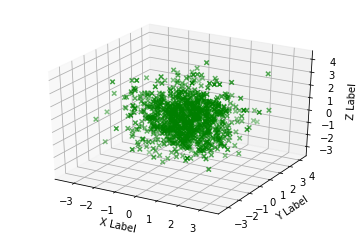

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("PD_test_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='g', marker='x')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### AltPD_test_dsl (AltPD)

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("AltPD_test_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("AltPD_test_dsl_embeddings.npy", embeddings)


Epoch 1/500
1000/1000 [==============================] - 10s 10ms/sample - loss: 34105.4094
Epoch 2/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 32696.1383
Epoch 3/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 24919.7762
Epoch 4/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 20995.3828
Epoch 5/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 19868.5270
Epoch 6/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 19218.0113
Epoch 7/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18783.2395
Epoch 8/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18514.9086
Epoch 9/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18273.0492
Epoch 10/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18061.5867
Epoch 11/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 17820.9703
Epoch 

1000/1000 [==============================] - 9s 9ms/sample - loss: 6412.7715
Epoch 182/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6414.7543
Epoch 183/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6416.2204
Epoch 184/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6409.9437
Epoch 185/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6402.3580
Epoch 186/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6400.6937
Epoch 187/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6401.0749
Epoch 188/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6397.2242
Epoch 189/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6393.5587
Epoch 190/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6391.7330
Epoch 191/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6390.0390
Epoch 192/500

1000/1000 [==============================] - 8s 8ms/sample - loss: 6269.7198
Epoch 362/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6269.2368
Epoch 363/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6270.2082
Epoch 364/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6269.1345
Epoch 365/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6270.2999
Epoch 366/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6268.2249
Epoch 367/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6267.0423
Epoch 368/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6267.7222
Epoch 369/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 6266.3588
Epoch 370/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6266.6944
Epoch 371/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 6264.7078
Epoch 372/500

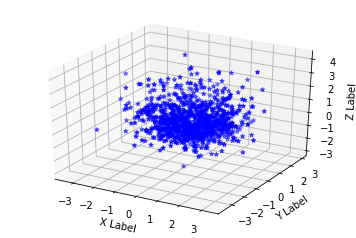

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("AltPD_test_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### outlier_dsl

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("outlier_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("outlier_dsl_embeddings.npy", embeddings)

Epoch 1/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 34202.2312
Epoch 2/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 30247.7766
Epoch 3/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 22044.5125
Epoch 4/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 20085.6645
Epoch 5/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 19441.7004
Epoch 6/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 19045.4496
Epoch 7/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 18720.5754
Epoch 8/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18556.8000
Epoch 9/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18410.7293
Epoch 10/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18298.2699
Epoch 11/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 18200.7812
Epoch 12

1000/1000 [==============================] - 8s 8ms/sample - loss: 13021.2904
Epoch 92/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 13005.4084
Epoch 93/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12994.2191
Epoch 94/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12984.2771
Epoch 95/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12979.9500
Epoch 96/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12976.7430
Epoch 97/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12966.9062
Epoch 98/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12947.9994
Epoch 99/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12936.6959
Epoch 100/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12925.0365
Epoch 101/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12931.9775
Epoch 102/

1000/1000 [==============================] - 9s 9ms/sample - loss: 12501.1180
Epoch 270/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12472.4762
Epoch 271/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12489.8555
Epoch 272/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12480.9504
Epoch 273/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12464.5516
Epoch 274/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12441.4143
Epoch 275/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12428.6127
Epoch 276/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12418.6289
Epoch 277/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12409.7484
Epoch 278/500
1000/1000 [==============================] - 9s 9ms/sample - loss: 12404.1939
Epoch 279/500
1000/1000 [==============================] - 8s 8ms/sample - loss: 12399.5982
Ep

1000/1000 [==============================] - 14s 14ms/sample - loss: 12357.3721
Epoch 444/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12346.8992
Epoch 445/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12342.4594
Epoch 446/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12337.0984
Epoch 447/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12321.6816
Epoch 448/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12315.1832
Epoch 449/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12308.0918
Epoch 450/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12304.5186
Epoch 451/500
1000/1000 [==============================] - 15s 15ms/sample - loss: 12300.2488
Epoch 452/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12297.0236
Epoch 453/500
1000/1000 [==============================] - 14s 14ms/sample

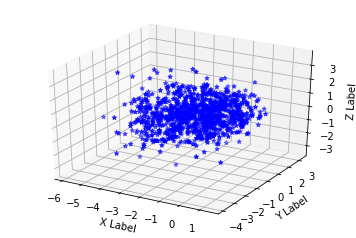

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("outlier_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### uniform_dsl (Syn)

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 50

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("uniform_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("uniform_dsl_embeddings.npy", embeddings)


Epoch 1/50
1000/1000 [==============================] - 19s 19ms/sample - loss: 34016.2023
Epoch 2/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 30277.2477
Epoch 3/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 22649.2723
Epoch 4/50
1000/1000 [==============================] - 14s 14ms/sample - loss: 19698.9871
Epoch 5/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18946.5480
Epoch 6/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18787.5250
Epoch 7/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18564.7570
Epoch 8/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18467.5469
Epoch 9/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18392.4781
Epoch 10/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18322.7594
Epoch 11/50
1000/1000 [==============================] - 15s 15ms/sample - loss: 18285.76

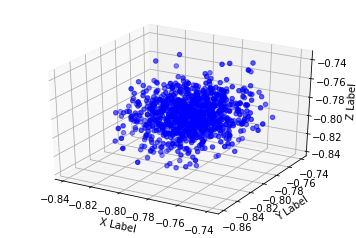

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("uniform_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### advpd_dsl (AdvPD)

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 100

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("advpd_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("advpd_dsl_embeddings.npy", embeddings)


Epoch 1/100
1000/1000 [==============================] - 18s 18ms/sample - loss: 34013.8281
Epoch 2/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 29849.6047
Epoch 3/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 22404.4930
Epoch 4/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 20050.9586
Epoch 5/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 19267.5578
Epoch 6/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 18772.4195
Epoch 7/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 18428.5059
Epoch 8/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 18165.7336
Epoch 9/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 17865.1902
Epoch 10/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 17498.3152
Epoch 11/100
1000/1000 [==============================] - 14s 14ms/sample - los

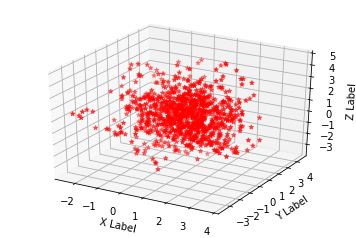

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("advpd_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### img_noise_train_dsl (NPD)

In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 200 #32
EPOCHS = 1000

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("img_noise_train_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("img_noise_train_dsl_embeddings.npy", embeddings)


Epoch 1/1000
1000/1000 [==============================] - 19s 19ms/sample - loss: 34197.3000
Epoch 2/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 27593.2109
Epoch 3/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 21330.9910
Epoch 4/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 19501.6023
Epoch 5/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 18944.8262
Epoch 6/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 18755.5184
Epoch 7/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 18545.7633
Epoch 8/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 18421.5555
Epoch 9/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 18345.3281
Epoch 10/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 18272.3828
Epoch 11/1000
1000/1000 [==============================] - 14s 14ms/s

1000/1000 [==============================] - 14s 14ms/sample - loss: 13791.9453
Epoch 175/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13784.0139
Epoch 176/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13774.9525
Epoch 177/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13770.6766
Epoch 178/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13765.4496
Epoch 179/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13769.5787
Epoch 180/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13765.6525
Epoch 181/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13760.4715
Epoch 182/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13762.4922
Epoch 183/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13764.4609
Epoch 184/1000
1000/1000 [==============================] - 14s 1

1000/1000 [==============================] - 15s 15ms/sample - loss: 13673.0422
Epoch 347/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13673.8387
Epoch 348/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13675.7393
Epoch 349/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13686.6404
Epoch 350/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13675.7350
Epoch 351/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13672.1896
Epoch 352/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13669.3039
Epoch 353/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13662.3172
Epoch 354/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13661.3105
Epoch 355/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13664.5875
Epoch 356/1000
1000/1000 [==============================] - 14s 1

1000/1000 [==============================] - 14s 14ms/sample - loss: 13594.9691
Epoch 519/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13598.6070
Epoch 520/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13602.4273
Epoch 521/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13605.9520
Epoch 522/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13608.0564
Epoch 523/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13604.2479
Epoch 524/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13602.8615
Epoch 525/1000
1000/1000 [==============================] - 15s 15ms/sample - loss: 13601.9182
Epoch 526/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13601.5705
Epoch 527/1000
1000/1000 [==============================] - 14s 14ms/sample - loss: 13598.4283
Epoch 528/1000
1000/1000 [==============================] - 14s 1

1000/1000 [==============================] - 9s 9ms/sample - loss: 13560.4561
Epoch 692/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13560.4965
Epoch 693/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13559.5146
Epoch 694/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13563.7449
Epoch 695/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13561.9695
Epoch 696/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13571.9211
Epoch 697/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13575.4518
Epoch 698/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13574.8432
Epoch 699/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13579.1924
Epoch 700/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13571.6357
Epoch 701/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 135

1000/1000 [==============================] - 9s 9ms/sample - loss: 13540.6373
Epoch 868/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13540.4115
Epoch 869/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13541.7906
Epoch 870/1000
1000/1000 [==============================] - 8s 8ms/sample - loss: 13542.3012
Epoch 871/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13542.9918
Epoch 872/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13549.8295
Epoch 873/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13553.2814
Epoch 874/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13561.3537
Epoch 875/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13555.4342
Epoch 876/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 13552.6152
Epoch 877/1000
1000/1000 [==============================] - 9s 9ms/sample - loss: 135

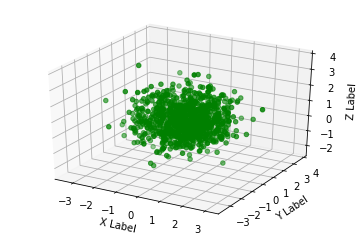

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("img_noise_train_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

##### plot without PCA

<IPython.core.display.Javascript object>


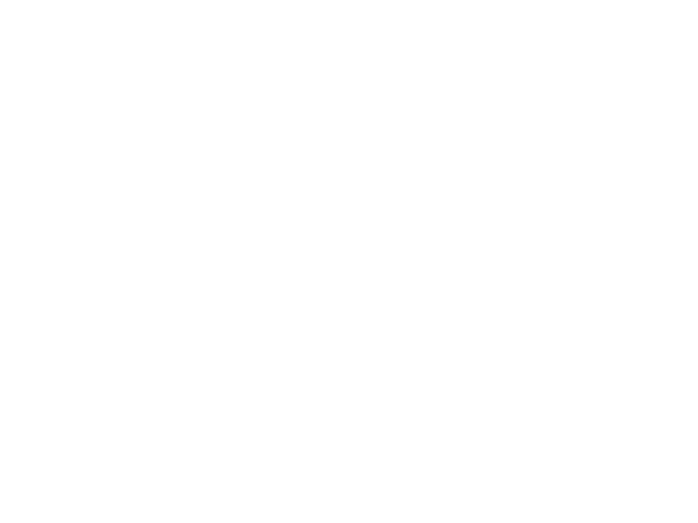

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Load the embeddings from the first .npy file
embeddings1 = np.load("train_dsl_embeddings.npy")


# Load the embeddings from the second .npy file
embeddings2 = np.load("outlier_dsl_embeddings.npy")

# Assuming the embeddings are 3-dimensional
x1, y1, z1 = embeddings1[:, 0], embeddings1[:, 1], embeddings1[:, 2]
x2, y2, z2 = embeddings2[:, 0], embeddings2[:, 1], embeddings2[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='r', marker='o', label='Confidential')
ax.scatter(x2, y2, z2, c='b', marker='x', label='Outlier')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend()
plt.show()


##### plot with PCA

<IPython.core.display.Javascript object>


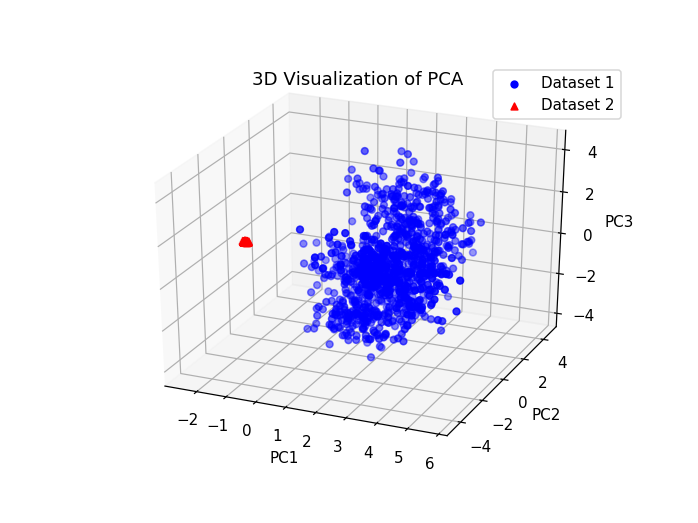

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib notebook

# Generate synthetic data for two datasets
dataset1 = np.load("train_dsl_embeddings.npy")  # Replace this with your dataset
dataset2 = np.load("uniform_dsl_embeddings.npy")  # Replace this with your dataset

# Concatenate the two datasets
combined_dataset = np.concatenate((dataset1, dataset2), axis=0)

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(combined_dataset)

# Split the PCA result back into the two datasets
pca_dataset1 = pca_result[:1000, :]
pca_dataset2 = pca_result[1000:, :]

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first dataset
ax.scatter(pca_dataset1[:, 0], pca_dataset1[:, 1], pca_dataset1[:, 2], c='b', marker='o', label='Dataset 1')

# Plot the second dataset
ax.scatter(pca_dataset2[:, 0], pca_dataset2[:, 1], pca_dataset2[:, 2], c='r', marker='^', label='Dataset 2')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of PCA')

plt.legend()
plt.show()

In [19]:
import numpy as np

def base_kernel(x, y, sigma):
    norm_square = np.linalg.norm(x - y) ** 2
    sigma_square = sigma ** 2
    return np.exp(-norm_square / (2 * sigma_square))

def composite_kernel(x, y, sigmas):
    result = 0
    for sigma in sigmas:
        result += base_kernel(x, y, sigma)
    return result

def compute_mmd(dataset_x, dataset_y, sigmas=[1, 5, 10, 15, 20]):
    result = 0
    n = len(dataset_x)
    m = len(dataset_y)
    
    for i in range(n):
        for j in range(n):
            result += 1. / (n ** 2) * composite_kernel(dataset_x[i], dataset_x[j], sigmas)
    
    for i in range(n):
        for j in range(m):
            result -= 2. / (n * m) * composite_kernel(dataset_x[i], dataset_y[j], sigmas)
    
    for i in range(m):
        for j in range(m):
            result += 1. / (m ** 2) * composite_kernel(dataset_y[i], dataset_y[j], sigmas)
    
    return np.sqrt(result)

# Test the function
mmd_value_custom = compute_mmd(dataset1, dataset2)
print("MMD between the two datasets (custom kernel):", mmd_value_custom)


('MMD between the two datasets (custom kernel):', 0.556322891544407)


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 100 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("cifar10_sample")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("cifar10_images.npy", embeddings)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/500
50000/50000 [==============================] - 270s 5ms/sample - loss: 18729.7384
Epoch 2/500
50000/50000 [==============================] - 268s 5ms/sample - loss: 14023.1444
Epoch 3/500
50000/50000 [==============================] - 268s 5ms/sample - loss: 13782.4555
Epoch 4/500
50000/50000 [==============================] - 283s 6ms/sample - loss: 13591.1394
Epoch 5/500
50000/50000 [==============================] - 508s 10ms/sample - loss: 13405.9445
Epoch 6/500
50000/50000 [==============================] - 510s 10ms/sample - loss: 13288.0757
Epoch 7/500
50000/50000 [==============================] - 506s 10ms/sample - loss: 13202.1494
Epoch 8/500
50000/50000 [==============================] - 511s 10ms/sample - loss: 13120.5841
Epoch 9/500
50000/50000 [=======

50000/50000 [==============================] - 267s 5ms/sample - loss: 11387.7232
Epoch 80/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 11380.8507
Epoch 81/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11381.7848
Epoch 82/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11372.7447
Epoch 83/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11360.4040
Epoch 84/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 11355.7676
Epoch 85/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11345.7931
Epoch 86/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11338.7372
Epoch 87/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11338.9935
Epoch 88/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 11329.9911
Epoch 89/500
50000/50000 [==============================] - 266

50000/50000 [==============================] - 266s 5ms/sample - loss: 11004.1880
Epoch 165/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 11012.0396
Epoch 166/500
50000/50000 [==============================] - 265s 5ms/sample - loss: 11000.9334
Epoch 167/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10997.0813
Epoch 168/500
50000/50000 [==============================] - 265s 5ms/sample - loss: 10992.8147
Epoch 169/500
50000/50000 [==============================] - 265s 5ms/sample - loss: 10992.3985
Epoch 170/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10993.6136
Epoch 171/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10992.9682
Epoch 172/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10982.3495
Epoch 173/500
50000/50000 [==============================] - 268s 5ms/sample - loss: 10978.3620
Epoch 174/500
50000/50000 [===========================

50000/50000 [==============================] - 265s 5ms/sample - loss: 10839.1132
Epoch 250/500
50000/50000 [==============================] - 264s 5ms/sample - loss: 10837.8912
Epoch 251/500
50000/50000 [==============================] - 264s 5ms/sample - loss: 10828.4066
Epoch 252/500
50000/50000 [==============================] - 265s 5ms/sample - loss: 10832.0213
Epoch 253/500
50000/50000 [==============================] - 270s 5ms/sample - loss: 10830.0188
Epoch 254/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 10822.0335
Epoch 255/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 10828.4247
Epoch 256/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10839.7888
Epoch 257/500
50000/50000 [==============================] - 267s 5ms/sample - loss: 10834.3404
Epoch 258/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10817.1814
Epoch 259/500
50000/50000 [===========================

50000/50000 [==============================] - 509s 10ms/sample - loss: 10734.0393
Epoch 335/500
50000/50000 [==============================] - 509s 10ms/sample - loss: 10733.9686
Epoch 336/500
50000/50000 [==============================] - 510s 10ms/sample - loss: 10729.4262
Epoch 337/500
50000/50000 [==============================] - 438s 9ms/sample - loss: 10730.6491
Epoch 338/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10730.6431
Epoch 339/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10733.7727
Epoch 340/500
50000/50000 [==============================] - 265s 5ms/sample - loss: 10727.3076
Epoch 341/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10723.9910
Epoch 342/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10728.2731
Epoch 343/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10727.3304
Epoch 344/500
50000/50000 [========================

50000/50000 [==============================] - 266s 5ms/sample - loss: 10665.8678
Epoch 420/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10655.8338
Epoch 421/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10656.7677
Epoch 422/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10660.2942
Epoch 423/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10660.4963
Epoch 424/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10662.7554
Epoch 425/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10659.3538
Epoch 426/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10653.0352
Epoch 427/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10653.5980
Epoch 428/500
50000/50000 [==============================] - 266s 5ms/sample - loss: 10668.2980
Epoch 429/500
50000/50000 [===========================

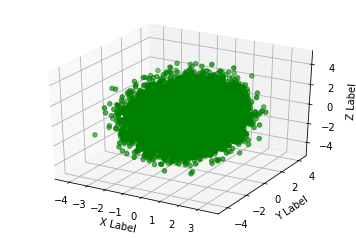

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("cifar10_50000.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()